# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [2]:
# Missing value treatment[Unused]
def deal_missing_value(df):
    # check on missing value
    print(pd.isna(df).sum())
    
    #drop the rows with missing value x8 
    #categorical data only
    df.dropna(axis=0, inplace=True)
    
    return df

# detecting the outliers using boxplot
def deal_outliers(df, col):
    Q1, Q3 = np.percentile(df[col] , [25, 75])
    IQR = Q3 - Q1
    ul = Q3 + 1.5 * IQR
    ll = Q1 - 1.5 * IQR

    outliers = df[(df[col] > ul) | (df[col] < ll)]
    print(len(outliers))
    
    df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))
    
    return df

# plot boxplot
def plot_boxplot(df, col, desc):
    sns.boxplot(x = col, data = df).set(title = 'Boxplot of ' + col + " " + desc)
    plt.show()
    
def obtain_unique_value(df, col):
    return dict(enumerate(df[col].unique()))

def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
def peek_scores(actual, scores, num = 20):
    print('actual |  score')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', scores[sel])


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
        
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

# Read Data file

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
#Show first 5 items of DataFrame df
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,36,blue-collar,married,middle,no,yes,may,cell,239,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
1,39,blue-collar,married,middle,yes,no,nov,NaN,124,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,False
2,31,services,single,middle,no,no,may,cell,163,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
3,35,technician,married,professional,yes,no,jul,cell,157,8,999,0,1.4,93.918,-42.7,4.962,5228.1,False
4,38,blue-collar,married,middle,yes,no,may,phone,275,6,999,0,1.1,93.994,-36.4,4.856,5191.0,False


In [5]:
#Show a quick description all attributes in housing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40000 non-null  int64  
 1   x2      40000 non-null  object 
 2   x3      40000 non-null  object 
 3   x4      40000 non-null  object 
 4   x5      40000 non-null  object 
 5   x6      40000 non-null  object 
 6   x7      40000 non-null  object 
 7   x8      39994 non-null  object 
 8   x9      40000 non-null  int64  
 9   x10     40000 non-null  int64  
 10  x11     40000 non-null  int64  
 11  x12     40000 non-null  int64  
 12  x13     40000 non-null  float64
 13  x14     39992 non-null  float64
 14  x15     40000 non-null  float64
 15  x16     40000 non-null  float64
 16  x17     40000 non-null  float64
 17  y       40000 non-null  bool   
dtypes: bool(1), float64(5), int64(5), object(7)
memory usage: 5.2+ MB


In [6]:
#Show the statistics of all numerical attributes in df
df.describe()

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,39992.000000,40000.000000,40000.000000,40000.000000
mean,40.012200,258.721825,2.566375,962.110625,0.173075,0.081885,93.576081,-40.501567,3.621611,5167.021655
std,10.416123,260.258055,2.771441,187.806197,0.495758,1.570986,0.578954,4.627286,1.734336,72.249786
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


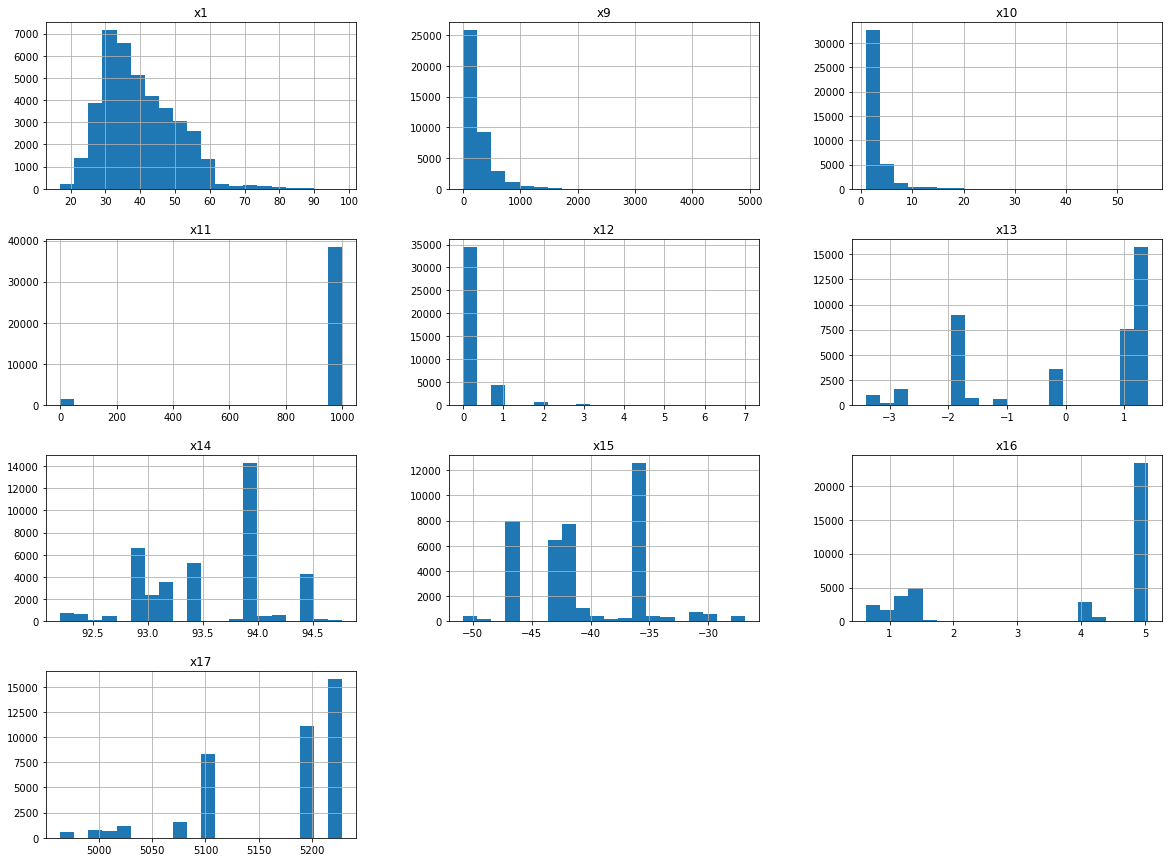

In [7]:
# plot the histogram of each numerical attribute
#20 bins= total 50 bars
df.hist(bins=20,figsize=(20,15))
plt.show()

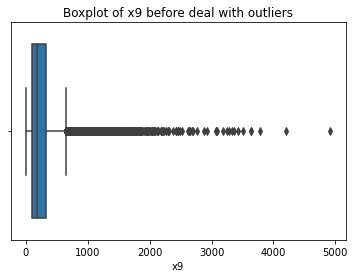

2862


C:\Users\shinj\AppData\Local\Temp\ipykernel_17164\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


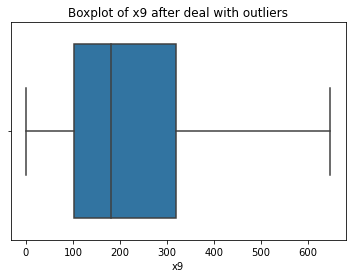

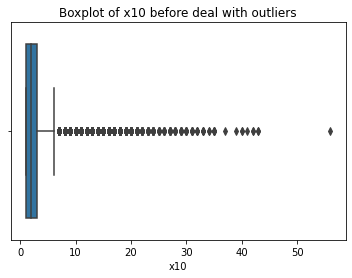

2332


C:\Users\shinj\AppData\Local\Temp\ipykernel_17164\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


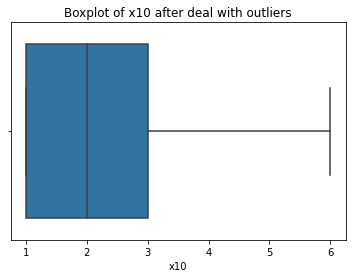

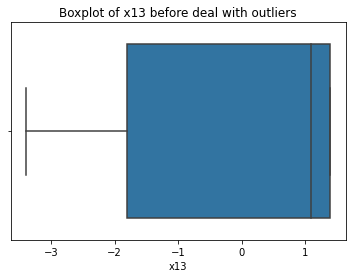

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_17164\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


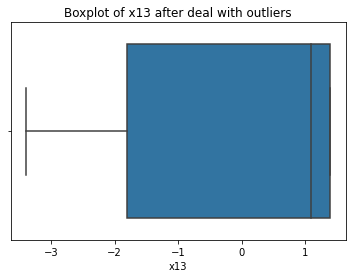

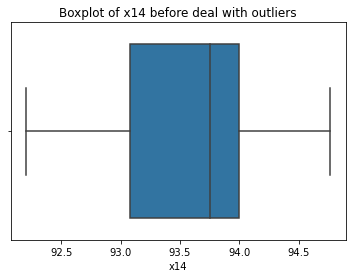

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_17164\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


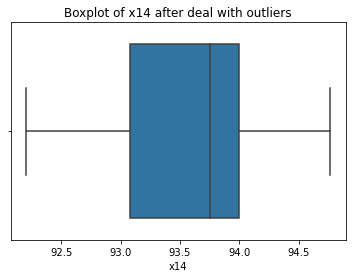

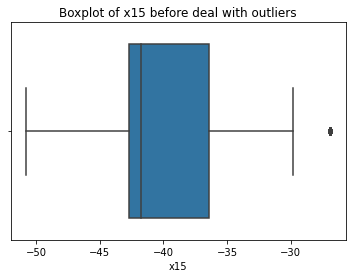

433


C:\Users\shinj\AppData\Local\Temp\ipykernel_17164\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


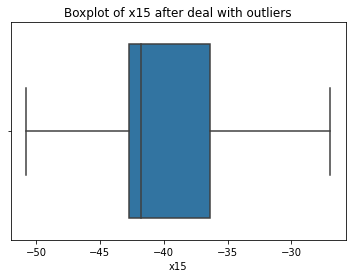

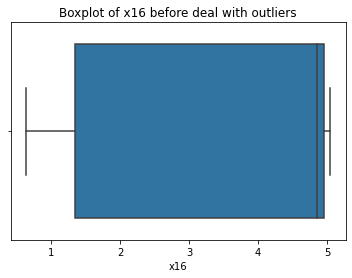

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_17164\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


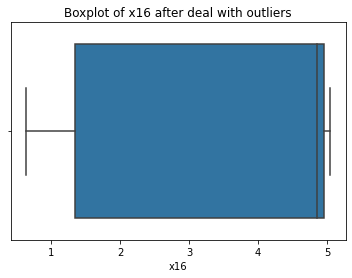

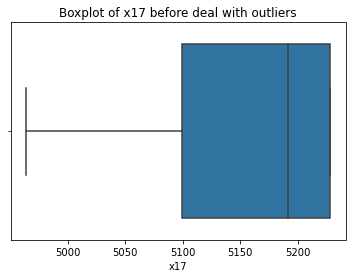

C:\Users\shinj\AppData\Local\Temp\ipykernel_17164\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


0


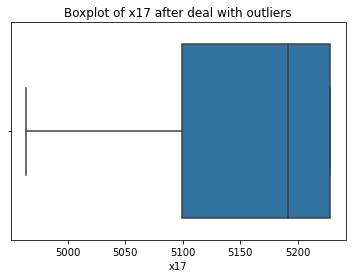

In [8]:
#plot boxplot to check outliers and whether the data is skewed or not
#check for outliers
#delete outliers
temp_df = df[['x9', 'x10', 'x13', 'x14','x15', 'x16', 'x17']]

# loop all the numeric features
for feature in temp_df:
    plot_boxplot(temp_df, feature, "before deal with outliers")
    temp_df = deal_outliers(temp_df, feature)
    plot_boxplot(temp_df, feature, "after deal with outliers")

In [9]:
#Show the correlation matrix
corr_matrix=df.corr()
corr_matrix

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
x1,1.000000,-0.000925,0.005496,-0.035615,0.024587,-0.000773,0.000380,0.128557,0.010629,-0.017344,0.031999
x9,-0.000925,1.000000,-0.072296,-0.047273,0.021044,-0.027163,0.005686,-0.008273,-0.032193,-0.043996,0.404339
x10,0.005496,-0.072296,1.000000,0.052989,-0.079899,0.150872,0.127956,-0.014130,0.135363,0.144438,-0.066920
x11,-0.035615,-0.047273,0.052989,1.000000,-0.589795,0.273055,0.080035,-0.092833,0.298944,0.374779,-0.327329
x12,0.024587,0.021044,-0.079899,-0.589795,1.000000,-0.420568,-0.202889,-0.048873,-0.454651,-0.501943,0.232859
x13,-0.000773,-0.027163,0.150872,0.273055,-0.420568,1.000000,0.775651,0.195617,0.972217,0.906907,-0.299165
x14,0.000380,0.005686,0.127956,0.080035,-0.202889,0.775651,1.000000,0.059424,0.688541,0.522326,-0.136666
x15,0.128557,-0.008273,-0.014130,-0.092833,-0.048873,0.195617,0.059424,1.000000,0.277303,0.099884,0.054047
x16,0.010629,-0.032193,0.135363,0.298944,-0.454651,0.972217,0.688541,0.277303,1.000000,0.945121,-0.309039
x17,-0.017344,-0.043996,0.144438,0.374779,-0.501943,0.906907,0.522326,0.099884,0.945121,1.000000,-0.355790


<AxesSubplot:>

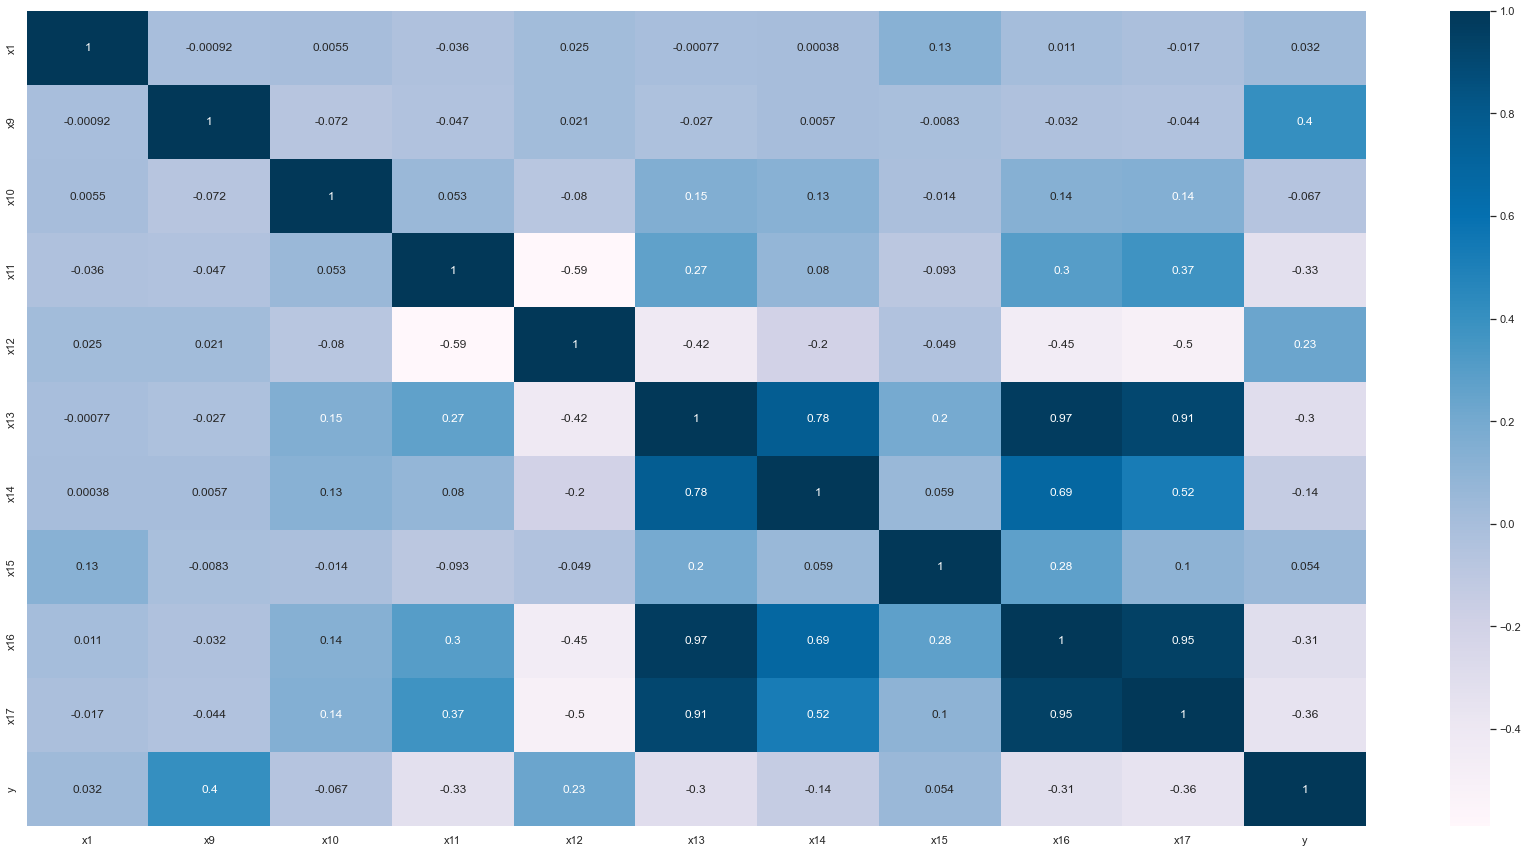

In [10]:
#annot=True: annotbool or rectangular dataset. If True, write the data value in each cell
corr = df.corr()
sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(corr, cmap="PuBu", annot=True)

In [11]:
#numeric data comparision only
corr_matrix['y'].sort_values(ascending=False)

y      1.000000
x9     0.404339
x12    0.232859
x15    0.054047
x1     0.031999
x10   -0.066920
x14   -0.136666
x13   -0.299165
x16   -0.309039
x11   -0.327329
x17   -0.355790
Name: y, dtype: float64

# Describe Categorical Data

In [13]:
df['x2'].value_counts()

admin            10130
blue-collar       8995
technician        6565
services          3843
management        2837
retired           1666
entrepreneur      1406
self-employed     1387
housemaid         1025
unemployed         984
student            843
unknown            319
Name: x2, dtype: int64

In [14]:
df['x3'].value_counts()

married     24172
single      11270
divorced     4480
unknown        78
Name: x3, dtype: int64

In [15]:
df['x4'].value_counts()

university      11820
high             9254
primary          6289
middle           5856
professional     5080
unknown          1684
illiterate         17
Name: x4, dtype: int64

In [16]:
df['x5'].value_counts()

yes        20952
no         18086
unknown      962
Name: x5, dtype: int64

In [17]:
df['x6'].value_counts()

no         32936
yes         6102
unknown      962
Name: x6, dtype: int64

In [18]:
df['x7'].value_counts()

may    13393
jul     6967
aug     5978
jun     5172
nov     3988
apr     2545
oct      696
sep      553
mar      532
dec      176
Name: x7, dtype: int64

In [19]:
df['x8'].value_counts()

cell     25356
phone    14638
Name: x8, dtype: int64

In [20]:
df['y'].value_counts()

False    35487
True      4513
Name: y, dtype: int64

# Check for missing value

In [21]:
#missing value
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     6
x9     0
x10    0
x11    0
x12    0
x13    0
x14    8
x15    0
x16    0
x17    0
y      0
dtype: int64